In [1]:
import matplotlib.pyplot as plt


import tensorflow as tf
from keras.datasets import mnist
 # == from tensorflow.keras.datasets import mnist

from keras.models import Sequential
from tensorflow.python.layers.core import dense


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape

(60000, 28, 28)

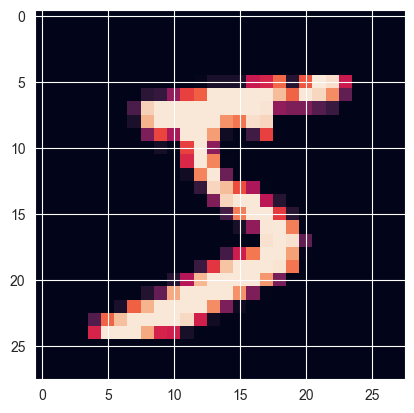

In [5]:
plt.imshow(X_train[0])
plt.show()

In [6]:
# reshape
X_train = X_train.reshape((60000, 28 * 28 * 1))
X_test = X_test.reshape((-1 , 28 * 28 * 1))
   # -1 == اي عدد للصور هو هيشفها ويحطها لوحده == 10000

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
# scaling [0, 255] -> [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# build DL model (Dense)
from keras.models import Sequential  # (block of layers)
from keras.layers import Dense

dense_model = Sequential()
# input layer
dense_model.add(Dense(1024, activation='relu', input_shape=(784,)))
# hidden layers
dense_model.add(Dense(512, activation='relu'))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(128, activation='relu'))
# output layer
dense_model.add(Dense(10, activation='softmax'))

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
dense_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compiling (optimzer , loss , metrics)
dense_model.compile(optimizer='adam' ,
                    loss = 'sparse_categorical_crossentropy'  , metrics=['accuracy'])

In [15]:
# training (train_data , epochs , batch_size ,validation_split)
dense_history = dense_model.fit(X_train , y_train , epochs=20 , batch_size=256 , validation_split=0.2)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9185 - loss: 0.2736 - val_accuracy: 0.9653 - val_loss: 0.1212
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9724 - loss: 0.0926 - val_accuracy: 0.9704 - val_loss: 0.1061
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9819 - loss: 0.0574 - val_accuracy: 0.9757 - val_loss: 0.0799
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9743 - val_loss: 0.0906
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9724 - val_loss: 0.1090
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9783 - val_loss: 0.0827
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9946 - loss: 0.0157 - val_accuracy: 0.9778 - val_loss: 0.0979
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accu

In [16]:
# evaluate model (test_data)
dense_model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0912


[0.09116777032613754, 0.9797000288963318]

In [17]:
dense_history.history

{'accuracy': [0.9184791445732117,
  0.9723541736602783,
  0.9819375276565552,
  0.9882083535194397,
  0.9903958439826965,
  0.9906874895095825,
  0.9946249723434448,
  0.9942499995231628,
  0.9931041598320007,
  0.9950624704360962,
  0.9955624938011169,
  0.9955833554267883,
  0.9968541860580444,
  0.996749997138977,
  0.9948541522026062,
  0.9981041550636292,
  0.9983333349227905,
  0.997083306312561,
  0.9977708458900452,
  0.996749997138977],
 'loss': [0.2736107110977173,
  0.09260165691375732,
  0.057418808341026306,
  0.037552718073129654,
  0.029297947883605957,
  0.02834409661591053,
  0.015721622854471207,
  0.016706667840480804,
  0.021185079589486122,
  0.015065659768879414,
  0.013593889772891998,
  0.01382875069975853,
  0.010418746620416641,
  0.011100717820227146,
  0.01619509980082512,
  0.006498761475086212,
  0.005949041806161404,
  0.010277894325554371,
  0.007559642661362886,
  0.010785752907395363],
 'val_accuracy': [0.9652500152587891,
  0.9704166650772095,
  0.975

Text(0.5, 1.0, 'Accuracy for Training & Validation')

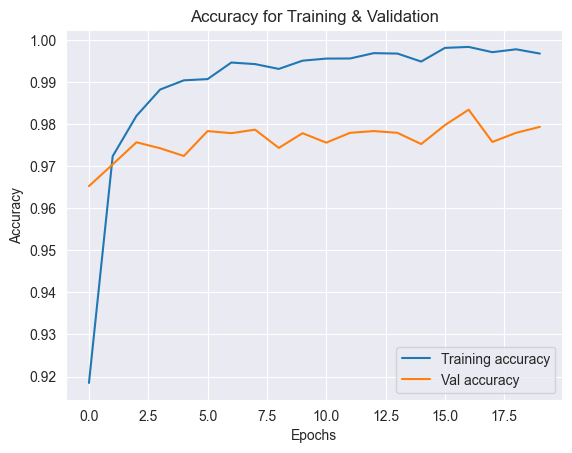

In [18]:
# plot accuracy for training & validation
plt.plot(dense_history.history['accuracy'] , label = 'Training accuracy')
plt.plot(dense_history.history['val_accuracy'] , label = 'Val accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Training & Validation')

Text(0.5, 1.0, 'Loss for Training & Validation')

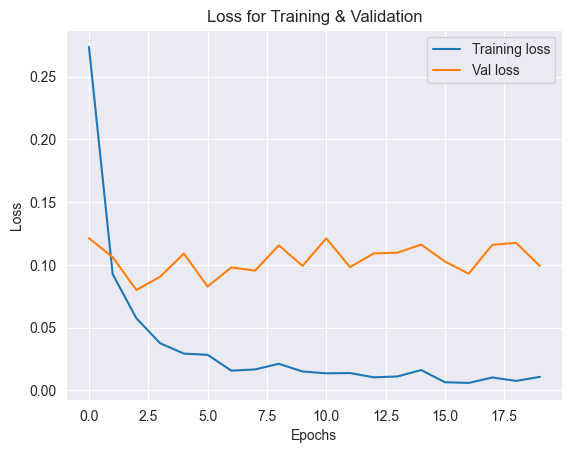

In [19]:
# plot loss for training & validation
plt.plot(dense_history.history['loss'] , label = 'Training loss')
plt.plot(dense_history.history['val_loss'] , label = 'Val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for Training & Validation')